C:\Users\ATMAYANTI\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ATMAYANTI\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ATMAYANTI\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


140.2588344466774


C:\Users\ATMAYANTI\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


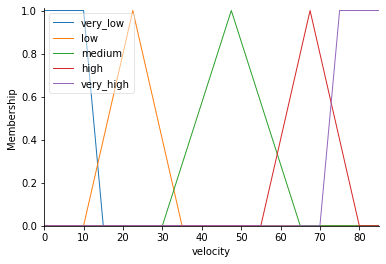

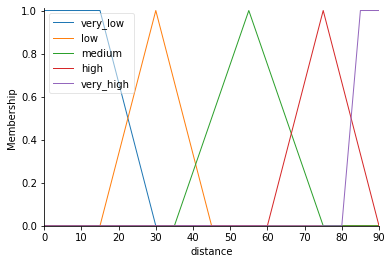

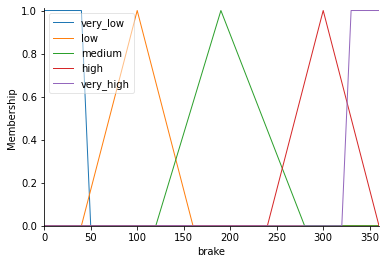

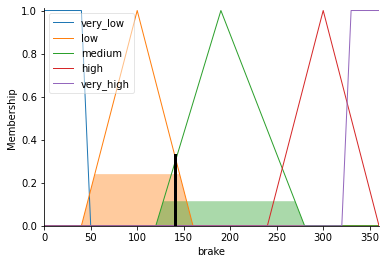

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

#the universe of variables and membership functions
velocity =ctrl.Antecedent(np.arange(0, 85.5, 0.5), 'velocity')
distance =ctrl.Antecedent(np.arange(0, 90.5, 0.5), 'distance')
brake =ctrl.Consequent(np.arange(0, 360.5, 0.5), 'brake')

#Rules

velocity['very_low'] = fuzz.trapmf(velocity.universe, [0, 0, 10, 15])
velocity['low'] = fuzz.trimf(velocity.universe, [10, 22.5, 35])
velocity['medium'] = fuzz.trimf(velocity.universe, [30, 47.5, 65])
velocity['high'] = fuzz.trimf(velocity.universe, [55, 67.5, 80])
velocity['very_high'] = fuzz.trapmf(velocity.universe, [70, 75, 85, 85])

distance['very_low'] = fuzz.trapmf(distance.universe, [0, 0, 15, 30])
distance['low'] = fuzz.trimf(distance.universe, [15, 30, 45])
distance['medium'] = fuzz.trimf(distance.universe, [35, 55, 75])
distance['high'] = fuzz.trimf(distance.universe, [60, 75, 90])
distance['very_high'] = fuzz.trapmf(distance.universe, [80, 85, 90, 90])

brake['very_low'] = fuzz.trapmf(brake.universe, [0, 0, 40, 50])
brake['low'] = fuzz.trimf(brake.universe, [40, 100, 160])
brake['medium'] = fuzz.trimf(brake.universe, [120, 190, 280])
brake['high'] = fuzz.trimf(brake.universe, [240, 300, 360])
brake['very_high'] = fuzz.trapmf(brake.universe, [320, 330, 360, 360])

velocity.view()
distance.view()
brake.view()

rule1 = ctrl.Rule(velocity['very_low'] & distance['very_low'], brake['medium'])
rule2 = ctrl.Rule(velocity['very_low'] & distance['low'], brake['low'])
rule3 = ctrl.Rule(velocity['very_low'] & distance['medium'], brake['low'])
rule4 = ctrl.Rule(velocity['very_low'] & distance['high'], brake['very_low'])
rule5 = ctrl.Rule(velocity['very_low'] & distance['very_high'], brake['very_low'])

rule6 = ctrl.Rule(velocity['low'] & distance['very_low'], brake['high'])
rule7 = ctrl.Rule(velocity['low'] & distance['low'], brake['medium'])
rule8 = ctrl.Rule(velocity['low'] & distance['medium'], brake['low'])
rule9 = ctrl.Rule(velocity['low'] & distance['high'], brake['very_low'])
rule10 = ctrl.Rule(velocity['low'] & distance['very_high'], brake['very_low'])

rule11 = ctrl.Rule(velocity['medium'] & distance['very_low'], brake['very_high'])
rule12 = ctrl.Rule(velocity['medium'] & distance['low'], brake['high'])
rule13 = ctrl.Rule(velocity['medium'] & distance['medium'], brake['medium'])
rule14 = ctrl.Rule(velocity['medium'] & distance['high'], brake['low'])
rule15 = ctrl.Rule(velocity['medium'] & distance['very_high'], brake['very_low'])

rule16 = ctrl.Rule(velocity['high'] & distance['very_low'], brake['very_high'])
rule17 = ctrl.Rule(velocity['high'] & distance['low'], brake['high'])
rule18 = ctrl.Rule(velocity['high'] & distance['medium'], brake['high'])
rule19 = ctrl.Rule(velocity['high'] & distance['high'], brake['medium'])
rule20 = ctrl.Rule(velocity['high'] & distance['very_high'], brake['low'])

rule21 = ctrl.Rule(velocity['very_high'] & distance['very_low'], brake['very_high'])
rule22 = ctrl.Rule(velocity['very_high'] & distance['low'], brake['very_high'])
rule23 = ctrl.Rule(velocity['very_high'] & distance['medium'], brake['high'])
rule24 = ctrl.Rule(velocity['very_high'] & distance['high'], brake['medium'])
rule25 = ctrl.Rule(velocity['very_high'] & distance['very_high'], brake['low'])

brake_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])

braking = ctrl.ControlSystemSimulation(brake_ctrl)

braking.input['velocity'] = 32
braking.input['distance'] = 56

braking.compute()

print(braking.output['brake'])

brake.view(sim=braking)

plt.show()

In [14]:
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt

In [15]:
#Problem: from service quality an food quality to tip amount
x_service = np.arange(0,10.01,0.5)
x_food= np.arange(0,10.01,0.5)
x_tip= np.arange(0,25.01,1.0)

In [16]:
#membership functions
service_low = fuzz.trimf(x_service,[0,0,5])
service_middle = fuzz.trimf(x_service,[0,5,10])
service_high = fuzz.trimf(x_service,[5,10,10])

food_low = fuzz.zmf(x_food,0,5)
food_middle = fuzz.pimf(x_food,0,4,5,10)
food_high = fuzz.smf(x_food,5,10)

In [17]:
#input: service score and food score
service_score = 9.5
food_score = 4.0

service_low_degree = fuzz.interp_membership(
        x_service,service_low,service_score)
service_middle_degree= fuzz.interp_membership(
        x_service,service_middle,service_score)
service_high_degree = fuzz.interp_membership(
x_service, service_high,service_score)

food_low_degree = fuzz.interp_membership(x_food, food_low, food_score)
food_middle_degree =fuzz.interp_membership(x_food,food_middle,food_score)
food_high_degree = fuzz.interp_membership(x_food, food_high, food_score)

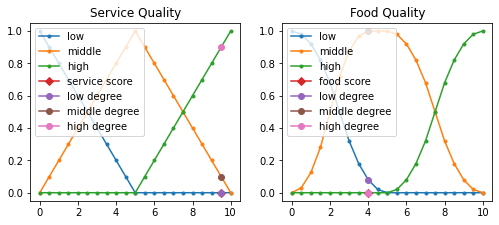

In [18]:
#whole config
fig_scale_x = 2.0
fig_scale_y = 1.5
fig = plt.figure(figsize=(6.4 * fig_scale_x, 4.8 * fig_scale_y))
row = 2
col = 3

plt.subplot(row, col , 1)
plt.title("Service Quality")
plt.plot(x_service, service_low,label="low",marker=".")
plt.plot(x_service, service_middle, label="middle",marker=".")
plt.plot(x_service, service_high, label="high",marker=".")
plt.plot(service_score, 0.0, label = "service score", marker="D")
plt.plot(service_score, service_low_degree,
        label="low degree", marker="o")
plt.plot(service_score, service_middle_degree,
        label="middle degree", marker="o")
plt.plot(service_score, service_high_degree,
        label="high degree", marker="o")
plt.legend(loc="upper left")

plt.subplot(row, col,2)
plt.title("Food Quality")
plt.plot(x_food, food_low, label="low", marker=".")
plt.plot(x_food, food_middle, label="middle", marker=".")
plt.plot(x_food, food_high, label="high", marker=".")
plt.plot(food_score, 0.0, label="food score", marker="D")
plt.plot(food_score, food_low_degree, label="low degree", marker="o")
plt.plot(food_score, food_middle_degree, label="middle degree", marker="o")
plt.plot(food_score, food_high_degree, label="high degree", marker="o")
plt.legend(loc="upper left")

In [19]:
#===================================================
#bad food OR bad Service
low_degree = np.fmax(service_low_degree, food_low_degree)
#medium service
middle_degree = service_middle_degree
#good food OR good service
high_degree = np.fmax(service_high_degree, food_high_degree)

In [20]:
# Apply the equaltion:
w1 = low_degree
w2 = middle_degree
w3 = high_degree

z1 = 5.0 + 0.2 * food_score + 0.2 * service_score
z2 = 5.0 + 0.5 * food_score + 0.5 * service_score
z3 = 5 + 1.0 * food_score + 1.0 * service_score
z = (w1 * z1 + w2 * z2 + w3 * z3) / (w1 + w2 + w3)
print(z)

17.075000000000003


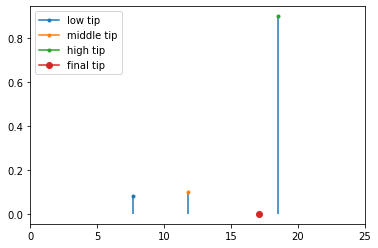

In [21]:
plt.plot(z1, w1, label="low tip", marker=".")
plt.xlim(0, 25)
plt.vlines(z1, 0.0, w1)
plt.plot(z2, w2, label="middle tip", marker=".")
plt.vlines(z2, 0.0, w2)
plt.plot(z3, w3, label="high tip", marker=".")
plt.vlines(z3, 0.0, w3)
plt.plot(z, 0.0, label="final tip", marker="o")
plt.legend(loc="upper left")

C:\Users\ATMAYANTI\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ATMAYANTI\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ATMAYANTI\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ATMAYANTI\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


973.9744550621491


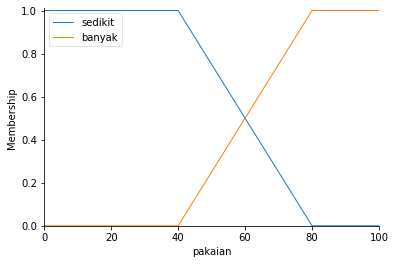

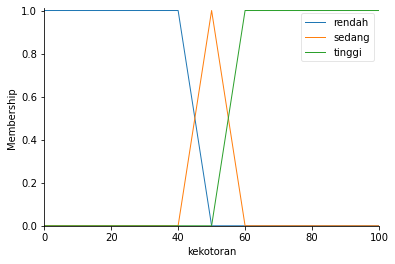

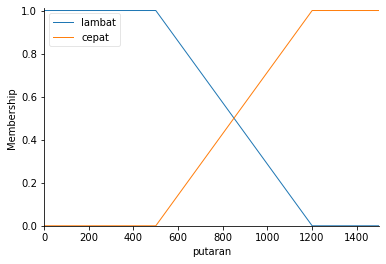

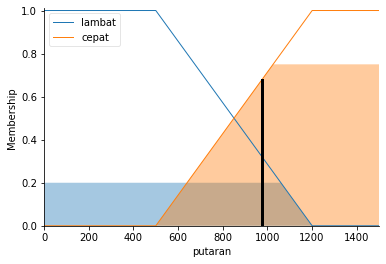

In [19]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Variable dan Fungsi Keanggotaan
pakaian =ctrl.Antecedent(np.arange(0, 100.5, 0.5), 'pakaian')
kekotoran =ctrl.Antecedent(np.arange(0, 100.5, 0.5), 'kekotoran')
putaran =ctrl.Consequent(np.arange(0, 1500.5, 0.5), 'putaran')

# Grafik Keanggotaan
pakaian['sedikit'] = fuzz.trapmf(pakaian.universe, [0, 0, 40, 80])
pakaian['banyak'] = fuzz.trapmf(pakaian.universe, [40, 80, 100, 100])

kekotoran['rendah'] = fuzz.trapmf(kekotoran.universe, [0, 0, 40, 50])
kekotoran['sedang'] = fuzz.trimf(kekotoran.universe, [40, 50, 60])
kekotoran['tinggi'] = fuzz.trapmf(kekotoran.universe, [50, 60, 100, 100])

putaran['lambat'] = fuzz.trapmf(putaran.universe, [0, 0, 500, 1200])
putaran['cepat'] = fuzz.trapmf(putaran.universe, [500, 1200, 1500, 1500])

# Visualisasi Grafik Keanggotaan
pakaian.view()
kekotoran.view()
putaran.view()

# Aturan
rule1 = ctrl.Rule(pakaian['sedikit'] & kekotoran['rendah'], putaran['lambat'])
rule2 = ctrl.Rule(pakaian['sedikit'] & kekotoran['sedang'], putaran['lambat'])
rule3 = ctrl.Rule(pakaian['sedikit'] & kekotoran['tinggi'], putaran['cepat'])
rule4 = ctrl.Rule(pakaian['banyak'] & kekotoran['rendah'], putaran['lambat'])
rule5 = ctrl.Rule(pakaian['banyak'] & kekotoran['sedang'], putaran['cepat'])
rule6 = ctrl.Rule(pakaian['banyak'] & kekotoran['tinggi'], putaran['cepat'])


# Defuzzifikasi dengan Average
putaran_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])

perputaran = ctrl.ControlSystemSimulation(putaran_ctrl)

perputaran.input['pakaian'] = 50
perputaran.input['kekotoran'] = 58

perputaran.compute()

# Visualisasi Output
print(perputaran.output['putaran'])

putaran.view(sim=perputaran)

plt.show()